In [1]:

import pygame
import random
import os
import time
import numpy as np
import math
import torch
import torch.nn.functional
import matplotlib.pyplot as plt
import torch.optim as opt
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.colors import LogNorm 
import matplotlib.cm as cm
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import copy

if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  

print(dev)


pygame 2.0.1 (SDL 2.0.14, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
cuda:0


D:\ComputerSoftwares\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
global target_order
target_order = "supervised"
global temp_list
temp_list = []
Agent_number_n=3;
Alpha = 0.666;



In [3]:
global temp_list
temp_list = []
def appen(_x_list,y):
    global temp_list
    temp_list.append(_x_list)
    
def appen_train(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    
    training_data.append(temp_list)
    training_label.append(S)
    

def read_training_data():
    for i in range(10000):
        appen_train(sorted(np.random.rand(Agent_number_n), reverse=True));

training_data=[]
training_label=[]
S=1.0
read_training_data();

def appen_test(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    testing_data.append(temp_list)
    testing_label.append(S)
    

def read_testing_data():
#     devided=20
#     for i1 in range(devided+1):
#         for i2 in range(i1+1):
#             for i3 in range(i2+1):
#                 appen_test(i1/devided,i2/devided,i3/devided);
    for i in range(1000):
        appen_test(sorted(np.random.rand(Agent_number_n), reverse=True));
                            

testing_data=[]
testing_label=[]
S=1.0
read_testing_data();

training_data=np.array(training_data)
training_label=np.array(training_label)
testing_data=np.array(testing_data)
testing_label=np.array(testing_label)
print(training_data)
print(testing_data)
print(training_label)
print(testing_label)

[[[0.4562064  0.10963404]
  [0.68862692 0.10963404]
  [0.68862692 0.4562064 ]]

 [[0.83977882 0.06734171]
  [0.98458408 0.06734171]
  [0.98458408 0.83977882]]

 [[0.85949053 0.80401183]
  [0.92120511 0.80401183]
  [0.92120511 0.85949053]]

 ...

 [[0.78028262 0.59941573]
  [0.94860921 0.59941573]
  [0.94860921 0.78028262]]

 [[0.90361793 0.74405405]
  [0.99820739 0.74405405]
  [0.99820739 0.90361793]]

 [[0.22346924 0.0772009 ]
  [0.7481844  0.0772009 ]
  [0.7481844  0.22346924]]]
[[[0.40903158 0.01779753]
  [0.7413184  0.01779753]
  [0.7413184  0.40903158]]

 [[0.77103112 0.31793833]
  [0.77947635 0.31793833]
  [0.77947635 0.77103112]]

 [[0.69777591 0.1830443 ]
  [0.87241591 0.1830443 ]
  [0.87241591 0.69777591]]

 ...

 [[0.81521213 0.01630882]
  [0.98104545 0.01630882]
  [0.98104545 0.81521213]]

 [[0.55039332 0.11235439]
  [0.9265257  0.11235439]
  [0.9265257  0.55039332]]

 [[0.83831944 0.55529738]
  [0.9960312  0.55529738]
  [0.9960312  0.83831944]]]
[1.25446735 1.89170461 2.584

In [4]:
def h_3_star(a, b, t):
    return a - min(a, t) + b - min(b, t) + max(min(a, t)+min(b, t), 2*t/3) + 1/2 * max(min(a, t)+min(b, t), t) - 1/2 * max(max(min(a, t), min(b, t)), 2*t/3) - t/6


def f_function(a, b, z):
    if(z >= 1):
        return (a+b)/2 + z/3
    else:
        return z/3 + h_3_star(a, b, 1-z)/2

def h_function(input_list):
    #input_list = sorted(input_list)
    g_list = []
    for j1 in range(len(input_list) ):
        for j2 in range(len(input_list)):
            if(j1 != j2):
                a = input_list[j1]
                b = input_list[j2]
                z = sum(input_list)- a-b

                g_list.append( f_function(a, b, z) * (Agent_number_n-1))
    h = sum(g_list) * 3 /  (Agent_number_n) /  (Agent_number_n-1) /  (Agent_number_n - 2)
    return h
                
                
x_list = []
y_list = []
z_list = []
result_list = []
training_supervised_label=[]
for index in range(len(training_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list.append(training_data[index][i][0])
        y_list.append(training_data[index][i][1])
        h = h_function(training_data[index][i])
        z_list.append(float(h))
        h_list.append(float(h))
    training_supervised_label.append(h_list)
    result_list.append(sum(h_list)/training_label[index]) 
    
    
print(max(result_list), min(result_list), max(result_list)-min(result_list))

2.3330069451469195 2.0 0.33300694514691953


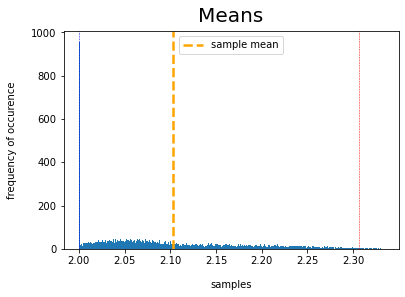

In [5]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

In [6]:
def h_function1(input_list,a,b):
    h = a[0]*max(sum(input_list),a[1]) + a[2]*max(sum(input_list),a[3]) + a[4]*max(input_list[0],a[5]) + b
    return h

In [7]:
len_a = 6


def Calculate(a):
    b = -100
    for index in range(len(training_data)):
        h_list = []
        for i in range(Agent_number_n):
            h = h_function1(training_data[index][i], a, b)
            h_list.append(float(h))
        if(sum(h_list) < (Agent_number_n-1)*training_label[index]):
            b += (training_label[index]*(Agent_number_n -
                                         1) - sum(h_list))/(Agent_number_n)

    result_list = []
    for index in range(len(training_data)):
        h_list = []
        for i in range(Agent_number_n):
            h = h_function1(training_data[index][i], a, b)
            h_list.append(float(h))
        result_list.append(sum(h_list)/training_label[index])
    return max(result_list)-min(result_list),a,b,[max(result_list),min(result_list)]


def Dichotomy(a_low, a_high):
    a_sum=0
    for i in range(len_a):
        a_sum += abs(a_high[i]-a_low[i])
    if(a_sum <= 1e-5):
        return a_low

    i = random.randint(0,len_a-1)
    a_mid = (a_low+a_high)/2
    a_mid_low = copy.deepcopy (a_mid)
    a_mid_high = copy.deepcopy (a_mid)
    a_mid_low[i] = (a_low[i]+a_mid[i])/2
    a_mid_high[i] = (a_high[i]+a_mid[i])/2
    res_mid_low,a,b,others = Calculate(a_mid_low)
    res_mid_high,a,b,others = Calculate(a_mid_high)
    #print(res_mid_low,res_mid_high)
    if(res_mid_low<res_mid_high):
        a_high[i] = (a_mid_high[i] + a_high[i])/2
    else:
        a_low[i] = (a_mid_low[i] + a_low[i])/2
    print(i)
    print(Calculate((a_low + a_high)/2))
    print()
    Dichotomy(a_low, a_high)

In [8]:
a_low = -np.ones(len_a)*2
a_high = np.ones(len_a)*2



Dichotomy(a_low, a_high)

1
(3.79423267657703, array([0.  , 0.25, 0.  , 0.  , 0.  , 0.  ]), 1.9314108921923432, [5.79423267657703, 2.0])

0
(2.8831885811264932, array([0.25, 0.25, 0.  , 0.  , 0.  , 0.  ]), 1.4485581691442575, [4.883188581126493, 2.0])

2
(1.9282865348481417, array([0.25, 0.25, 0.25, 0.  , 0.  , 0.  ]), 0.9657054460961717, [3.9282865348481417, 2.0])

5
(1.9282865348481417, array([0.25, 0.25, 0.25, 0.  , 0.  , 0.25]), 0.9657054460961717, [3.9282865348481417, 2.0])

3
(1.9282865348481417, array([ 0.25,  0.25,  0.25, -0.25,  0.  ,  0.25]), 0.9657054460961717, [3.9282865348481417, 2.0])

1
(1.8970313610658711, array([ 0.25   ,  0.03125,  0.25   , -0.25   ,  0.     ,  0.25   ]), 0.9657054460961717, [3.897031361065871, 2.0])

5
(1.8970313610658711, array([ 0.25   ,  0.03125,  0.25   , -0.25   ,  0.     ,  0.46875]), 0.9657054460961717, [3.897031361065871, 2.0])

5
(1.8970313610658711, array([ 0.25      ,  0.03125   ,  0.25      , -0.25      ,  0.        ,
        0.66015625]), 0.9657054460961717, [3.8

2
(0.5299708906595462, array([ 1.03053199,  0.65088451,  0.53683942,  0.72687994, -0.84406744,
        0.6650629 ]), 0.16704949464288726, [2.529970890659546, 2.0])

0
(0.47162232653267067, array([ 0.95536754,  0.65088451,  0.53683942,  0.72687994, -0.84406744,
        0.6650629 ]), 0.21597287099833581, [2.4716223265326707, 2.0])

5
(0.5984503094932223, array([ 0.95536754,  0.65088451,  0.53683942,  0.72687994, -0.84406744,
        0.76323688]), 0.29883832749316713, [2.5984503094932223, 2.0])

1
(0.614069355777064, array([ 0.95536754,  0.73678674,  0.53683942,  0.72687994, -0.84406744,
        0.76323688]), 0.27668860928289435, [2.614069355777064, 2.0])

0
(0.5971464212028454, array([ 0.88959864,  0.73678674,  0.53683942,  0.72687994, -0.84406744,
        0.76323688]), 0.32572979191754303, [2.5971464212028454, 2.0])

5
(0.7180158275381086, array([ 0.88959864,  0.73678674,  0.53683942,  0.72687994, -0.84406744,
        0.84913911]), 0.39823706635052025, [2.7180158275381086, 2.0])

0
(0.6

3
(0.6757029424000089, array([ 0.69486733,  0.80373008,  0.47305158,  0.61404843, -1.03880936,
        0.95714705]), 0.854428888687239, [2.675702942400009, 2.0])

4
(0.6746767626373535, array([ 0.69486733,  0.80373008,  0.47305158,  0.61404843, -1.06140813,
        0.95714705]), 0.876059242710589, [2.6746767626373535, 2.0])

5
(0.6628310229881205, array([ 0.69486733,  0.80373008,  0.47305158,  0.61404843, -1.06140813,
        0.93984486]), 0.8576945578197822, [2.6628310229881205, 2.0])

3
(0.650681795542797, array([ 0.69486733,  0.80373008,  0.47305158,  0.58822125, -1.06140813,
        0.93984486]), 0.8576945578197822, [2.650681795542797, 2.0])

0
(0.657195485648197, array([ 0.72069451,  0.80373008,  0.47305158,  0.58822125, -1.06140813,
        0.93984486]), 0.8363847286756544, [2.657195485648197, 2.0])

3
(0.6465649116335399, array([ 0.72069451,  0.80373008,  0.47305158,  0.56562247, -1.06140813,
        0.93984486]), 0.8363847286756544, [2.64656491163354, 2.0])

0
(0.64078997320141

2
(0.6134231191525323, array([ 0.65153524,  0.85602196,  0.50434007,  0.50415654, -0.96533782,
        0.92762909]), 0.7591002302710653, [2.6134231191525323, 2.0])

3
(0.6095287589305163, array([ 0.65153524,  0.85602196,  0.50434007,  0.4963914 , -0.96533782,
        0.92762909]), 0.7591002302710653, [2.6095287589305163, 2.0])

2
(0.6073838686988133, array([ 0.65153524,  0.85602196,  0.51593119,  0.4963914 , -0.96533782,
        0.92762909]), 0.7490250379127159, [2.6073838686988133, 2.0])

4
(0.6073838686988133, array([ 0.65153524,  0.85602196,  0.51593119,  0.4963914 , -0.95757268,
        0.92762909]), 0.7418218665133461, [2.6073838686988133, 2.0])

1
(0.6076354811933014, array([ 0.65153524,  0.87579589,  0.51593119,  0.4963914 , -0.95757268,
        0.92762909]), 0.737611738241873, [2.6076354811933014, 2.0])

5
(0.6076354811933014, array([ 0.65153524,  0.87579589,  0.51593119,  0.4963914 , -0.95757268,
        0.91986395]), 0.7301760506719951, [2.6076354811933014, 2.0])

1
(0.612342

4
(0.5837785194694005, array([ 0.63773187,  0.9255983 ,  0.5359185 ,  0.46071261, -0.91416492,
        0.91084641]), 0.6705372838944114, [2.5837785194694005, 2.0])

4
(0.5834702419293119, array([ 0.63773187,  0.9255983 ,  0.5359185 ,  0.46071261, -0.91279639,
        0.91084641]), 0.6691862734651046, [2.583470241929312, 2.0])

3
(0.582219059561802, array([ 0.63773187,  0.9255983 ,  0.5359185 ,  0.45837796, -0.91279639,
        0.91084641]), 0.6691862734651046, [2.582219059561802, 2.0])

2
(0.5793530938582863, array([ 0.63773187,  0.9255983 ,  0.54186369,  0.45837796, -0.91279639,
        0.91084641]), 0.6635571742923345, [2.5793530938582863, 2.0])

1
(0.5731459563940726, array([ 0.63773187,  0.91783316,  0.54186369,  0.45837796, -0.91279639,
        0.91084641]), 0.6643741551590913, [2.5731459563940726, 2.0])

2
(0.5783624236542355, array([ 0.63773187,  0.91783316,  0.54706573,  0.45837796, -0.91279639,
        0.91084641]), 0.661989655460455, [2.5783624236542355, 2.0])

1
(0.575797384

3
(0.5701497881574284, array([ 0.63108296,  0.93003927,  0.55406884,  0.45618068, -0.91862753,
        0.90609894]), 0.6595815954130377, [2.5701497881574284, 2.0])

0
(0.569525240889825, array([ 0.63162038,  0.93003927,  0.55406884,  0.45618068, -0.91862753,
        0.90609894]), 0.6588638296430815, [2.569525240889825, 2.0])

5
(0.5709620050300135, array([ 0.63162038,  0.93003927,  0.55406884,  0.45618068, -0.91862753,
        0.90453491]), 0.6588638296430814, [2.5709620050300135, 2.0])

4
(0.5708890540044238, array([ 0.63162038,  0.93003927,  0.55406884,  0.45618068, -0.91831251,
        0.90453491]), 0.6585528390268749, [2.5708890540044242, 2.0000000000000004])

4
(0.5708252218570329, array([ 0.63162038,  0.93003927,  0.55406884,  0.45618068, -0.91803686,
        0.90453491]), 0.658280722237694, [2.570825221857033, 2.0])

0
(0.5702787429978793, array([ 0.63209062,  0.93003927,  0.55406884,  0.45618068, -0.91803686,
        0.90453491]), 0.6576526771889823, [2.5702787429978793, 2.0])


5
(0.5633743180112392, array([ 0.632241  ,  0.92194608,  0.55770363,  0.45934896, -0.91830916,
        0.89994034]), 0.654017441341463, [2.563374318011239, 2.0])

1
(0.5629860022223729, array([ 0.632241  ,  0.92256027,  0.55770363,  0.45934896, -0.91830916,
        0.89994034]), 0.653629125552597, [2.562986002222373, 2.0])

4
(0.5629835768360358, array([ 0.632241  ,  0.92256027,  0.55770363,  0.45934896, -0.91840388,
        0.89994034]), 0.6537143626901242, [2.562983576836036, 2.0])

4
(0.5629814546229914, array([ 0.632241  ,  0.92256027,  0.55770363,  0.45934896, -0.91848675,
        0.89994034]), 0.6537889451854606, [2.5629814546229914, 2.0])

1
(0.5626416783077337, array([ 0.632241  ,  0.92309768,  0.55770363,  0.45934896, -0.91848675,
        0.89994034]), 0.6534491688702028, [2.5626416783077337, 2.0])

2
(0.563816818732084, array([ 0.632241  ,  0.92309768,  0.55890109,  0.45934896, -0.91848675,
        0.89994034]), 0.6528991154578017, [2.563816818732084, 2.0])

4
(0.563814961795

0
(0.5627936266200844, array([ 0.63106671,  0.92289137,  0.55796791,  0.46003585, -0.91883907,
        0.90027234]), 0.6547807992382976, [2.5627936266200844, 2.0])

2
(0.5634815080634477, array([ 0.63106671,  0.92289137,  0.55866984,  0.46003585, -0.91883907,
        0.90027234]), 0.6544578858773114, [2.5634815080634477, 2.0])

5
(0.5630936826481365, array([ 0.63106671,  0.92289137,  0.55866984,  0.46003585, -0.91883907,
        0.9000613 ]), 0.6542639731696556, [2.5630936826481365, 2.0])

0
(0.5630913892097809, array([ 0.63102952,  0.92289137,  0.55866984,  0.46003585, -0.91883907,
        0.9000613 ]), 0.654298299082453, [2.563091389209781, 2.0])

4
(0.5630906668874509, array([ 0.63102952,  0.92289137,  0.55866984,  0.46003585, -0.91886754,
        0.9000613 ]), 0.6543239297373105, [2.563090666887451, 2.0])

2
(0.5624887706245087, array([ 0.63102952,  0.92289137,  0.55805565,  0.46003585, -0.91886754,
        0.9000613 ]), 0.6546064789281737, [2.5624887706245087, 2.0])

1
(0.56256683

1
(0.5623336942042316, array([ 0.63084744,  0.92322503,  0.55865185,  0.46034646, -0.91899838,
        0.8999703 ]), 0.6541503720212759, [2.5623336942042316, 2.0])

3
(0.5623157075006255, array([ 0.63084744,  0.92322503,  0.55865185,  0.46036316, -0.91899838,
        0.8999703 ]), 0.6541412680325747, [2.5623157075006255, 2.0])

0
(0.5623156437620604, array([ 0.63085722,  0.92322503,  0.55865185,  0.46036316, -0.91899838,
        0.8999703 ]), 0.6541320131846987, [2.5623156437620604, 2.0])

0
(0.5623161688345308, array([ 0.63086578,  0.92322503,  0.55865185,  0.46036316, -0.91899838,
        0.8999703 ]), 0.6541241088073787, [2.562316168834531, 2.0])

1
(0.562339633182046, array([ 0.63086578,  0.92318784,  0.55865185,  0.46036316, -0.91899838,
        0.8999703 ]), 0.6541475731548939, [2.562339633182046, 2.0])

0
(0.5623391734649967, array([ 0.63085829,  0.92318784,  0.55865185,  0.46036316, -0.91899838,
        0.8999703 ]), 0.6541544892064112, [2.5623391734649967, 2.0])

2
(0.56269175

5
(0.5625382680321511, array([ 0.63081965,  0.92336992,  0.55924586,  0.46042007, -0.91897004,
        0.8997564 ]), 0.6535479336495834, [2.562538268032151, 2.0])

3
(0.5625298888637027, array([ 0.63081965,  0.92336992,  0.55924586,  0.46042756, -0.91897004,
        0.8997564 ]), 0.6535437440653593, [2.5625298888637027, 2.0])

2
(0.5624122024673457, array([ 0.63081965,  0.92336992,  0.55912216,  0.46042756, -0.91897004,
        0.8997564 ]), 0.6536007028016999, [2.5624122024673457, 2.0])

3
(0.5624048723167827, array([ 0.63081965,  0.92336992,  0.55912216,  0.46043412, -0.91897004,
        0.8997564 ]), 0.6535970377264184, [2.5624048723167827, 2.0])

1
(0.5623986998714736, array([ 0.63081965,  0.9233797 ,  0.55912216,  0.46043412, -0.91897004,
        0.8997564 ]), 0.6535908652811093, [2.5623986998714736, 2.0])

5
(0.5623986998714736, array([ 0.63081965,  0.9233797 ,  0.55912216,  0.46043412, -0.91897004,
        0.8997782 ]), 0.653610901006638, [2.5623986998714736, 2.0])

3
(0.5623922

0
(0.5623621621124606, array([ 0.63081204,  0.92340805,  0.55913569,  0.46046198, -0.91894189,
        0.89984273]), 0.6536122036484436, [2.5623621621124606, 2.0])

2
(0.5622833271264973, array([ 0.63081204,  0.92340805,  0.55905281,  0.46046198, -0.91894189,
        0.89984273]), 0.6536503644045639, [2.5622833271264973, 2.0])

1
(0.5622801612623078, array([ 0.63081204,  0.92341307,  0.55905281,  0.46046198, -0.91894189,
        0.89984273]), 0.6536471985403745, [2.562280161262308, 2.0])

2
(0.5623491418750253, array([ 0.63081204,  0.92341307,  0.55912533,  0.46046198, -0.91894189,
        0.89984273]), 0.6536138078787692, [2.5623491418750253, 2.0])

4
(0.5623491418750253, array([ 0.63081204,  0.92341307,  0.55912533,  0.46046198, -0.91894121,
        0.89984273]), 0.6536131985106731, [2.5623491418750253, 2.0])

0
(0.5623491044797309, array([ 0.63081127,  0.92341307,  0.55912533,  0.46046198, -0.91894121,
        0.89984273]), 0.6536139131732833, [2.562349104479731, 2.0])

2
(0.5622887

0
(0.5622133162954137, array([ 0.63080828,  0.92343018,  0.55900798,  0.46047381, -0.91893891,
        0.89985682]), 0.6536641667732593, [2.5622133162954137, 2.0])

1
(0.562211895478856, array([ 0.63080828,  0.92343243,  0.55900798,  0.46047381, -0.91893891,
        0.89985682]), 0.653662745956701, [2.562211895478856, 2.0])

1
(0.5622106522643673, array([ 0.63080828,  0.9234344 ,  0.55900798,  0.46047381, -0.91893891,
        0.89985682]), 0.6536615027422125, [2.5622106522643673, 2.0])

5
(0.5622106522643673, array([ 0.63080828,  0.9234344 ,  0.55900798,  0.46047381, -0.91893891,
        0.89985798]), 0.6536625643583837, [2.5622106522643673, 2.0])

1
(0.5622095644516896, array([ 0.63080828,  0.92343613,  0.55900798,  0.46047381, -0.91893891,
        0.89985798]), 0.6536614765457062, [2.5622095644516896, 2.0])

0
(0.5622095497737192, array([ 0.63080798,  0.92343613,  0.55900798,  0.46047381, -0.91893891,
        0.89985798]), 0.6536617571977941, [2.562209549773719, 2.0])

0
(0.562209536

5
(0.5622146936841657, array([ 0.63080658,  0.92344278,  0.55902296,  0.46047814, -0.91893772,
        0.89986105]), 0.6536512917603033, [2.5622146936841657, 2.0])

0
(0.5622146892717268, array([ 0.63080649,  0.92344278,  0.55902296,  0.46047814, -0.91893772,
        0.89986105]), 0.6536513761411509, [2.562214689271727, 2.0])

5
(0.5622146892717272, array([ 0.63080649,  0.92344278,  0.55902296,  0.46047814, -0.91893772,
        0.89986126]), 0.6536515632402322, [2.5622146892717272, 2.0])

3
(0.5622144291137392, array([ 0.63080649,  0.92344278,  0.55902296,  0.46047838, -0.91893772,
        0.89986126]), 0.6536514331612382, [2.562214429113739, 2.0])

4
(0.5622144291137392, array([ 0.63080649,  0.92344278,  0.55902296,  0.46047838, -0.91893756,
        0.89986126]), 0.6536512928872207, [2.562214429113739, 2.0])

1
(0.5622140019353701, array([ 0.63080649,  0.92344346,  0.55902296,  0.46047838, -0.91893756,
        0.89986126]), 0.6536508657088516, [2.56221400193537, 2.0])

0
(0.5622139980

2
(0.5622058363211129, array([ 0.63080595,  0.92344657,  0.55901692,  0.46047876, -0.91893676,
        0.89986186]), 0.6536518029650578, [2.562205836321113, 2.0])

2
(0.5622094913338893, array([ 0.63080595,  0.92344657,  0.55902076,  0.46047876, -0.91893676,
        0.89986186]), 0.6536500335977066, [2.5622094913338893, 2.0])

4
(0.5622094913338898, array([ 0.63080595,  0.92344657,  0.55902076,  0.46047876, -0.91893672,
        0.89986186]), 0.6536500013078506, [2.5622094913338898, 2.0])

2
(0.5622062931977099, array([ 0.63080595,  0.92344657,  0.5590174 ,  0.46047876, -0.91893672,
        0.89986186]), 0.6536515495042827, [2.56220629319771, 2.0])

2
(0.5622034948285526, array([ 0.63080595,  0.92344657,  0.55901445,  0.46047876, -0.91893672,
        0.89986186]), 0.653652904176161, [2.5622034948285526, 2.0])

2
(0.5622059434015654, array([ 0.63080595,  0.92344657,  0.55901703,  0.46047876, -0.91893672,
        0.89986186]), 0.6536517188382676, [2.5622059434015654, 2.0])

2
(0.562203800

KeyboardInterrupt: 